In [112]:
html_code ="""<div style="text-align: center; background-color: #f0f0f0; padding: 20px;">
    <h1 style="color: #333;">Heart_disease_Prediction</h1>
</div>"""

HTML(html_code)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from IPython.display import HTML

In [4]:
train=pd.read_csv('heart_disease_data.csv')

In [5]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
train['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [7]:
train['fbs'].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

In [8]:
train['restecg'].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

In [10]:
train['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [9]:
train['slope'].value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

In [12]:
train['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [10]:
train['thal'].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

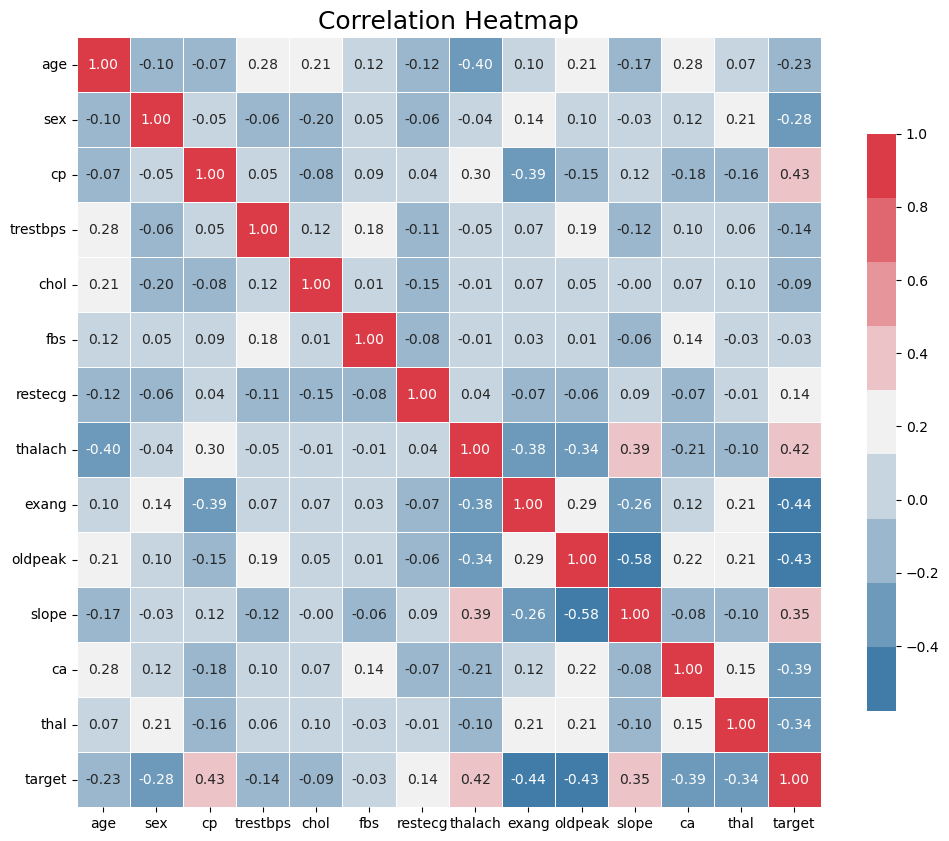

In [11]:
#heat map is not a very good indicator:
correlation_matrix = train.corr()
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.75})
plt.title('Correlation Heatmap', fontsize=18)
plt.yticks(rotation=0)
plt.show()


C:\Users\Harsh\AppData\Local\Temp\ipykernel_22600\3179914548.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['age'][train['target']==1])
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

<Axes: xlabel='age', ylabel='Density'>

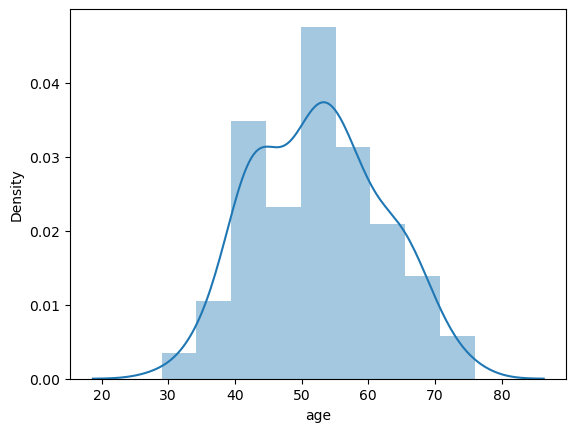

In [12]:
#checking relation with age:
sns.distplot(train['age'][train['target']==1])

C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

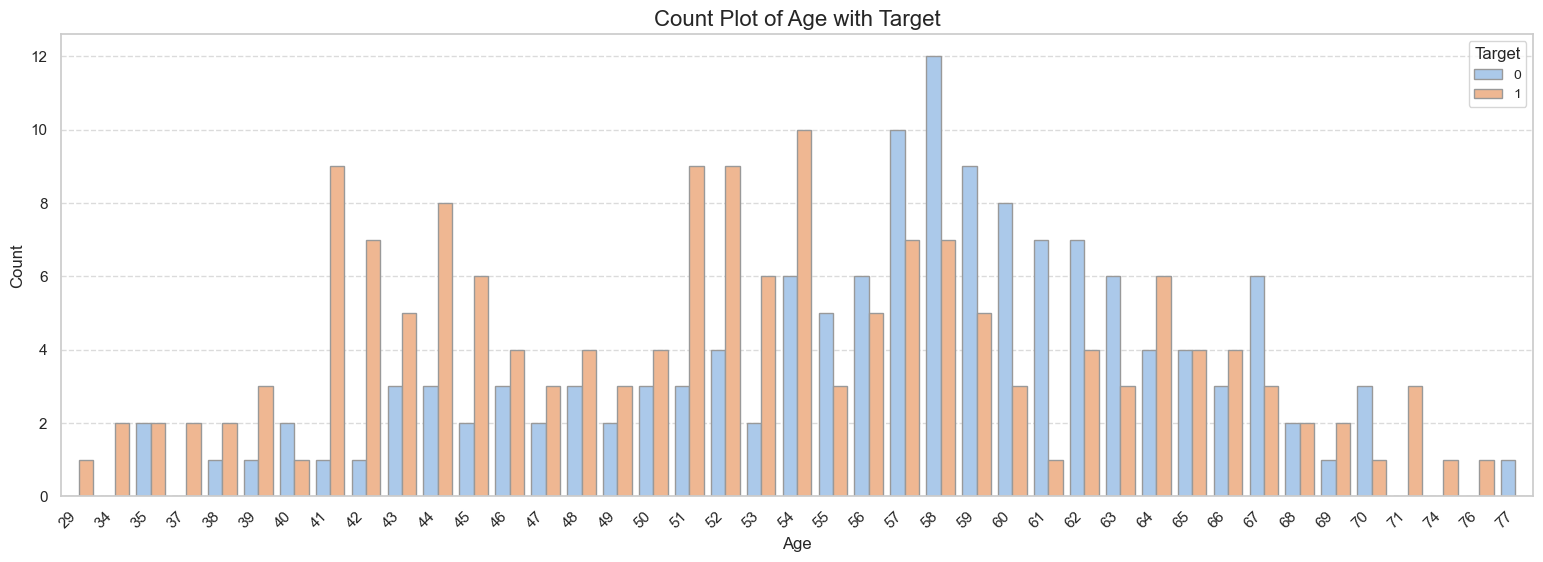

In [13]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(19, 6))

sns.countplot(x='age', hue='target', data=train, edgecolor=".6")

plt.title('Count Plot of Age with Target', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Target', labels=['0', '1'], fontsize=10)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_22600\843366433.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['trestbps'][train['target']==1])
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mod

<Axes: xlabel='trestbps', ylabel='Density'>

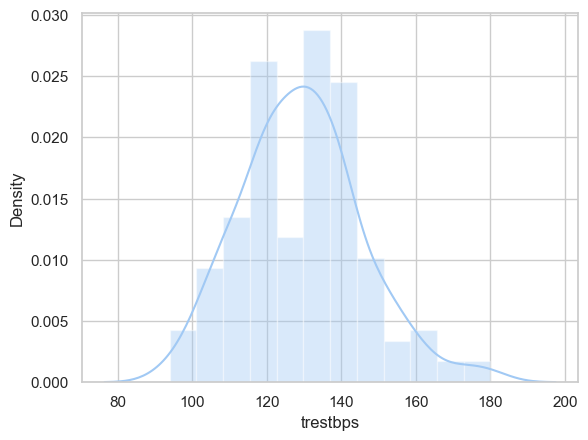

In [14]:
sns.distplot(train['trestbps'][train['target']==1])

C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

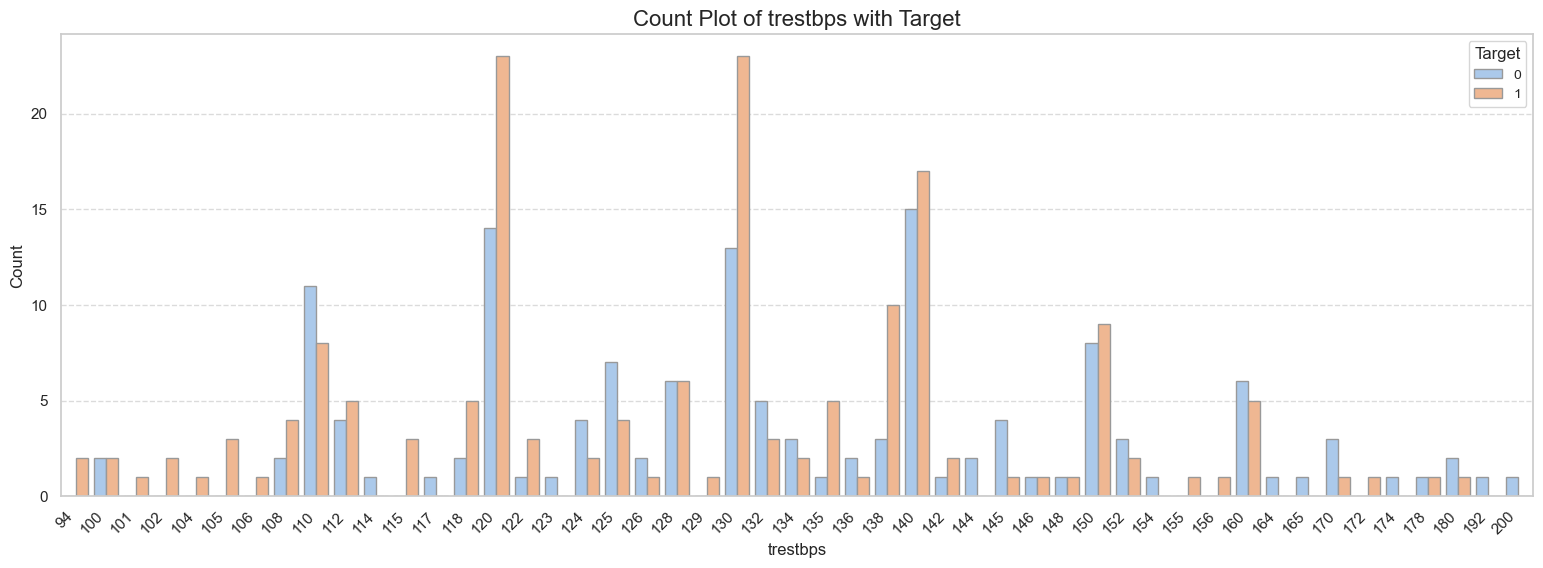

In [15]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(19, 6))

sns.countplot(x='trestbps', hue='target', data=train, edgecolor=".6")

plt.title('Count Plot of trestbps with Target', fontsize=16)
plt.xlabel('trestbps', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Target', labels=['0', '1'], fontsize=10)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_22600\3574687862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['chol'][train['target']==1])
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

<Axes: xlabel='chol', ylabel='Density'>

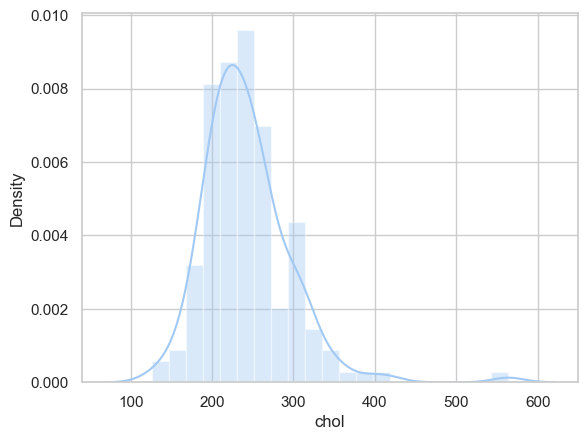

In [16]:
sns.distplot(train['chol'][train['target']==1])

C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

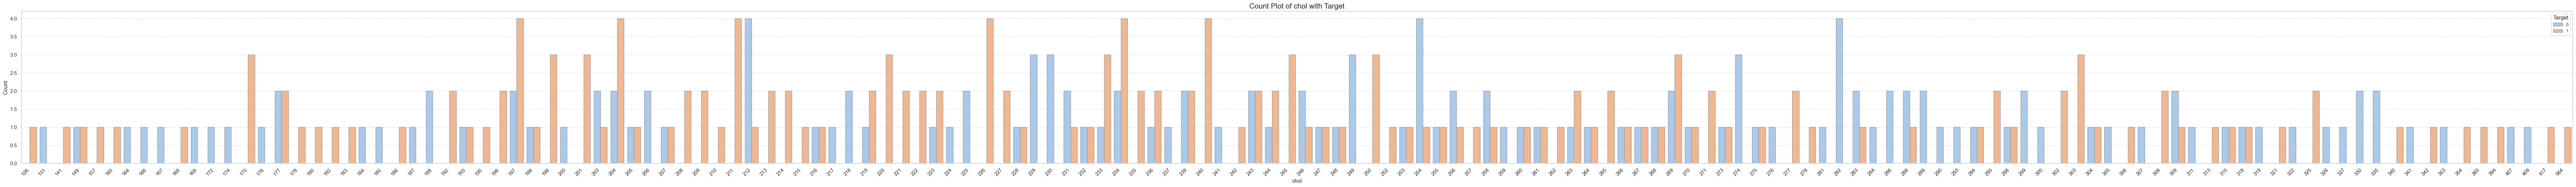

In [17]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(100, 6))

sns.countplot(x='chol', hue='target', data=train, edgecolor=".6")

plt.title('Count Plot of chol with Target', fontsize=16)
plt.xlabel('chol', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Target', labels=['0', '1'], fontsize=10)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_22600\198807225.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['thalach'][train['target']==1])
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

<Axes: xlabel='thalach', ylabel='Density'>

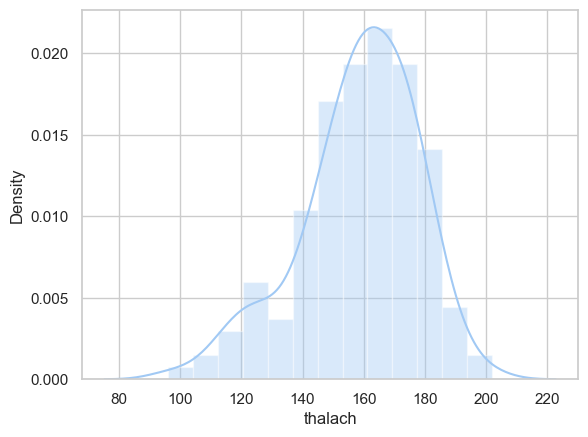

In [18]:
sns.distplot(train['thalach'][train['target']==1])

C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

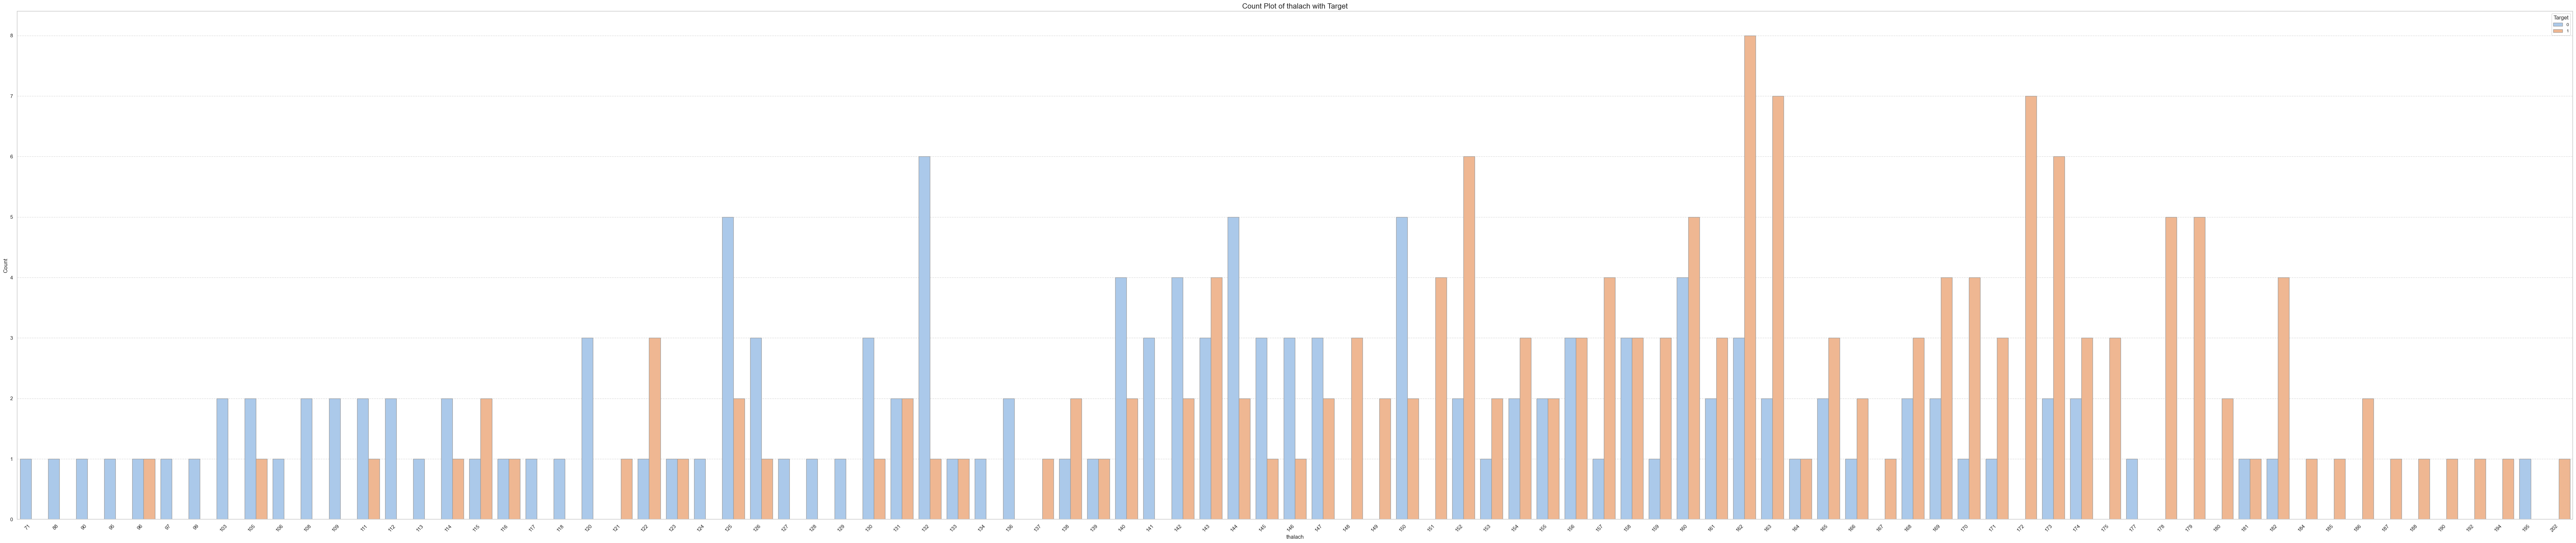

In [19]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(100, 20))

sns.countplot(x='thalach', hue='target', data=train, edgecolor=".6")

plt.title('Count Plot of thalach with Target', fontsize=16)
plt.xlabel('thalach', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Target', labels=['0', '1'], fontsize=10)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_22600\1919927391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['oldpeak'][train['target']==1])
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mod

<Axes: xlabel='oldpeak', ylabel='Density'>

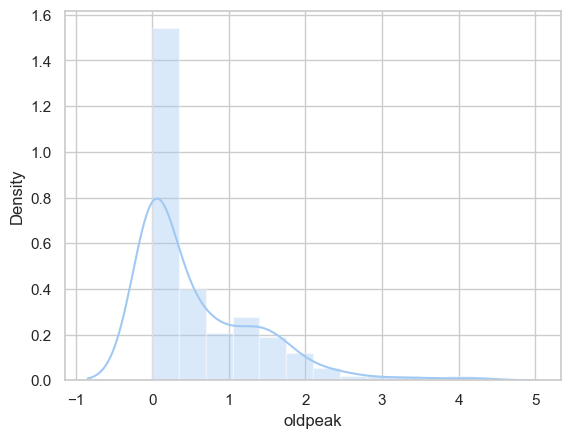

In [20]:
sns.distplot(train['oldpeak'][train['target']==1])

C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

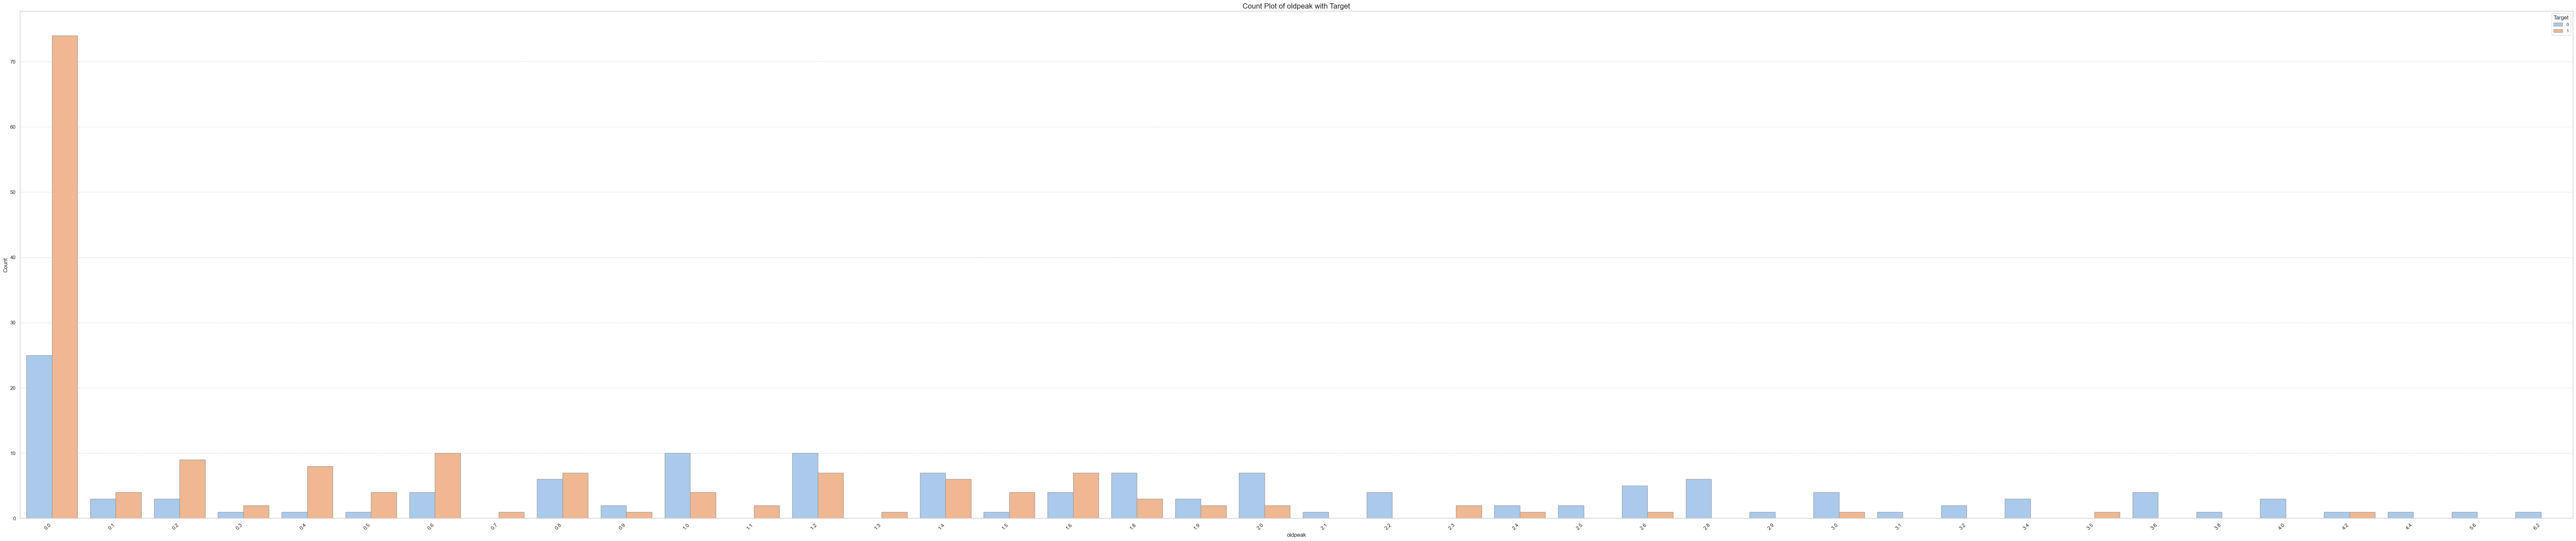

In [21]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(100, 20))

sns.countplot(x='oldpeak', hue='target', data=train, edgecolor=".6")

plt.title('Count Plot of oldpeak with Target', fontsize=16)
plt.xlabel('oldpeak', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Target', labels=['0', '1'], fontsize=10)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
train.groupby(['sex'])['target'].mean() #it gives the percentage of people in female and male respectively who have a heart disease

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

In [23]:
train.groupby(['cp'])['target'].mean()

cp
0    0.272727
1    0.820000
2    0.793103
3    0.695652
Name: target, dtype: float64

In [24]:
train.groupby(['fbs'])['target'].mean()

fbs
0    0.550388
1    0.511111
Name: target, dtype: float64

In [25]:
train.groupby(['restecg'])['target'].mean()

restecg
0    0.462585
1    0.631579
2    0.250000
Name: target, dtype: float64

In [26]:
train.groupby(['exang'])['target'].mean()

exang
0    0.696078
1    0.232323
Name: target, dtype: float64

In [27]:
train.groupby(['slope'])['target'].mean()

slope
0    0.428571
1    0.350000
2    0.753521
Name: target, dtype: float64

In [28]:
train.groupby(['ca'])['target'].mean()

ca
0    0.742857
1    0.323077
2    0.184211
3    0.150000
4    0.800000
Name: target, dtype: float64

In [29]:
train.groupby(['thal'])['target'].mean()

thal
0    0.500000
1    0.333333
2    0.783133
3    0.239316
Name: target, dtype: float64

In [30]:
#chances whether a person has diseaese or not depends on all the input features:
train.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [31]:
train=pd.get_dummies(train,columns=['sex','cp','fbs','restecg','thalach','exang','slope','ca','thal'],drop_first=True)

In [32]:
train

,age,trestbps,chol,oldpeak,target,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,2.3,1,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,3.5,1,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,1.4,1,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,0.8,1,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,0.6,1,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0.2,0,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,45,110,264,1.2,0,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
300,68,144,193,3.4,0,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
301,57,130,131,1.2,0,True,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [33]:
X=train.drop(columns=['target']).values
Y=train['target'].values

In [34]:
X

array([[63, 145, 233, ..., True, False, False],
       [37, 130, 250, ..., False, True, False],
       [41, 130, 204, ..., False, True, False],
       ...,
       [68, 144, 193, ..., False, False, True],
       [57, 130, 131, ..., False, False, True],
       [57, 130, 236, ..., False, True, False]], dtype=object)

# LOGISTIC REGRESSION

In [67]:
#model training on logistic regression:
model=LogisticRegression()

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [69]:
model.fit(X_train,Y_train)

C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
Y_predict_train=model.predict(X_train)
training_accuracy=accuracy_score(Y_train,Y_predict_train)
print(training_accuracy)

0.8801652892561983


In [71]:
Y_predict_test=model.predict(X_test)
test_accuracy=accuracy_score(Y_test,Y_predict_test)
print(test_accuracy)

0.7868852459016393


# RANDOM FOREST CLASSIFIER

In [108]:
#model training on RandomForestClassifier
model=RandomForestClassifier()

In [109]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [110]:
Y_predict_train=model.predict(X_train)
training_accuracy=accuracy_score(Y_train,Y_predict_train)
print(training_accuracy) #reason we have a small data set hence;looks like the model has remebered the answers hence it is giving such answers

1.0


In [111]:
Y_predict_test=model.predict(X_test)
test_accuracy=accuracy_score(Y_test,Y_predict_test)
print(test_accuracy)

0.8032786885245902
